In [1]:
import numpy as np
import scipy as sp
import qutip as qt
import matplotlib.pyplot as plt

In [187]:
from qutip import hinton, identity, to_super, sigmaz, tensor, tensor_contract, sigmax, projection, jmat, basis, sigmay
from qutip.core.gates import cnot, hadamard_transform

In [122]:
rho0 = tensor(projection(3,1,1), identity([2]))
ket0_id = tensor(projection(3,1,1), identity([2]))
ket1_id = tensor(projection(3,0,0), identity([2]))
id_ket0 = tensor(identity(3), projection(2,0,0))
id_ket1 = tensor(identity(3), projection(2,1,1))

In [48]:
SzNV = tensor(jmat(1,'z'), identity([2]))
SxNV = tensor(jmat(1,'x'),identity([2]))
SzX = tensor(identity(3), jmat(1/2,'z'))
SxX = tensor(identity(3), jmat(1/2,'x'))

In [62]:
GHz=1e3
MHz=1
kHz=1e-3

ms=1e3
us=1
ns=1e-3

B = 360
Delta = 2.87 * GHz
omegaNV = - (2.8 * B)
omegaX = 2.8 * B
D = 60 * kHz

In [60]:
nv0 = basis(3,1)
nv1 = basis(3,0)
nvm1 = basis(3,2)
x0 = basis(2,0)
x1 = basis(2,1)

In [32]:
H0 = Delta * SzNV**2 + omegaNV * SzNV + omegaX * SzX + D * SzNV * SzX

In [34]:
Delta * SzNV**2 + omegaNV * SzNV

Quantum object: dims=[[3, 2], [3, 2]], shape=(6, 6), type='oper', dtype=CSR, isherm=True
Qobj data =
[[1862.    0.    0.    0.    0.    0.]
 [   0. 1862.    0.    0.    0.    0.]
 [   0.    0.    0.    0.    0.    0.]
 [   0.    0.    0.    0.    0.    0.]
 [   0.    0.    0.    0. 3878.    0.]
 [   0.    0.    0.    0.    0. 3878.]]

In [44]:
fNV = Delta+omegaNV
fX = round(omegaX)
Omega = 50*MHz

In [99]:
cNV = qt.coefficient(lambda t: Omega*(np.cos(fNV*t)))
cX = qt.coefficient(lambda t: Omega*(np.cos(fX*t)))

In [100]:
H_drive = cNV*SxNV + cX*SxX

In [123]:
H_t = H0 + H_drive

In [129]:
t_list = np.arange(0,1,.01)*us

In [130]:
NvPi2 = (-1j*(np.pi/4)*SxNV).expm()
XPi2 = (-1j*(np.pi/4)*SxX).expm()

In [131]:
rho1 = NvPi2*XPi2*rho0*XPi2.conj().trans()*NvPi2.conj().trans()

In [132]:
res = qt.mesolve(H_t, ket0_id, t_list, e_ops = [ket0_id, ket1_id])

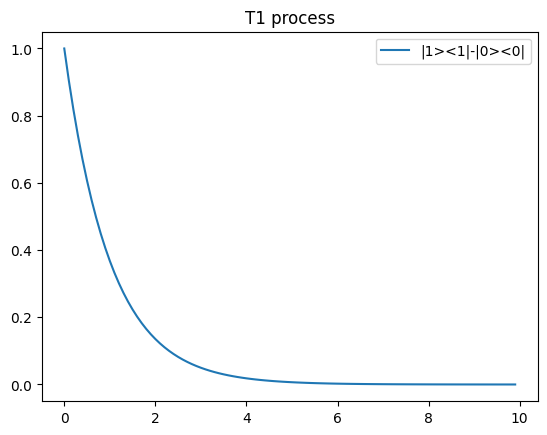

In [213]:
t_list = np.arange(0,10,.1)
H = 2*np.pi*sigmaz()
rho0 = projection(2,1,1)
res = qt.mesolve(H, rho0, t_list,c_ops=[0.5*sigmax(), 0.5*sigmay()] ,e_ops = [-projection(2,0,0)+projection(2,1,1)])
plt.plot(t_list,res.expect[0],label="|1><1|-|0><0|")
#plt.plot(t_list,res.expect[1],label="|1><1|")
plt.legend()
plt.title("T1 process")
plt.show()

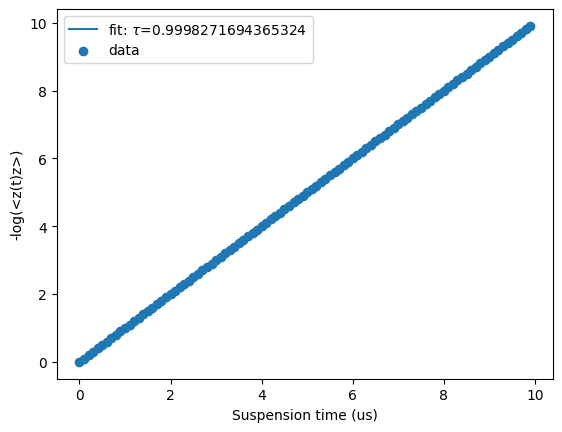

In [214]:
x=t_list
y=-np.log(res.expect[0])

pz = np.polyfit(x,y, 1)
plt.plot(x, x*pz[0] + pz[1],label=r"fit: $\tau$="+str(1/pz[0]))
plt.scatter(x,y,label="data")
plt.legend()
plt.xlabel("Suspension time (us)")
plt.ylabel("-log(<z(t)z>)")
plt.show()

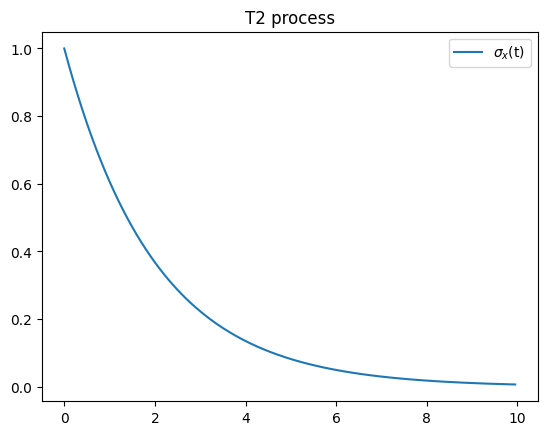

In [215]:
t_list = np.arange(0,10,.05)
H = identity(2) #2*np.pi*sigmaz()
rho0 = 0.5*(identity(2)+sigmax())
res = qt.mesolve(H, rho0, t_list,c_ops=[.5*sigmaz()] ,e_ops = [sigmax()])
plt.plot(t_list,res.expect[0],label=r"$\sigma_x$(t)")
#plt.plot(t_list,res.expect[1],label="|1><1|")
plt.legend()
plt.title("T2 process")
plt.show()

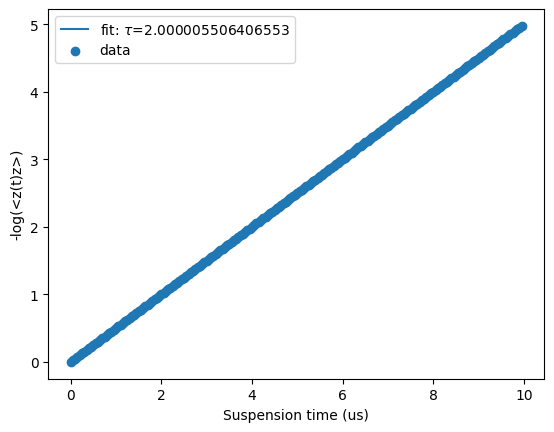

In [216]:
x=t_list
y=-np.log(res.expect[0])

pz = np.polyfit(x,y, 1)
plt.plot(x, x*pz[0] + pz[1],label=r"fit: $\tau$="+str(1/pz[0]))
plt.scatter(x,y,label="data")
plt.legend()
plt.xlabel("Suspension time (us)")
plt.ylabel("-log(<z(t)z>)")
plt.show()

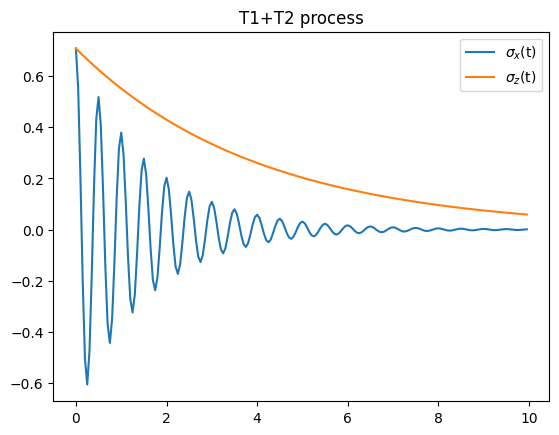

In [221]:
t_list = np.arange(0,10,.05)
H = 2*np.pi*sigmaz()
rho0 = 0.5*(identity(2)+isqt2*sigmax()+isqt2*sigmaz())
res = qt.mesolve(H, rho0, t_list,c_ops=[.25*sigmax(), 0.25*sigmay(), .5*sigmaz()] ,e_ops = [sigmax(), sigmaz()])
plt.plot(t_list,res.expect[0],label=r"$\sigma_x$(t)")
plt.plot(t_list,res.expect[1],label=r"$\sigma_z$(t)")
plt.legend()
plt.title("T1+T2 process")
plt.show()

In [202]:
isqt2=1/np.sqrt(2)